### Ishaan Mehta E18CSE069 EB02 LabWeek5

In [3]:
train_path='./train.csv'
test_path='./test.csv'

In [4]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import time


In [29]:
raw_data=pd.read_csv(train_path,skiprows = 1,header=None)
test_data=pd.read_csv(test_path,skiprows = 1,header=None)


In [30]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
raw_data.shape

(16999, 1025)

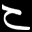

8


In [32]:
cv2_imshow(raw_data.loc[0,1:].to_numpy().reshape(32,32))
print(raw_data.loc[0,0])

In [33]:
def preprocess_data(raw_data):
  X=[]
  minmax=MinMaxScaler()
  onehot_enc=OneHotEncoder()
  for i in range(raw_data.shape[0]):
    X.append(minmax.fit_transform(raw_data.loc[i,1:].to_numpy().reshape(32,32)).flatten())
  # y=raw_data.loc[:,0].to_numpy()
  y=raw_data[0]
  

  return np.array(X),y

In [34]:

X,y=preprocess_data(raw_data)
X_test,y_test=preprocess_data(test_data)

In [35]:
(X.shape,y.shape)

((16999, 1024), (16999,))

In [36]:
def run_model(X,y,nodes):
  start_time = time.time()
  print('RUNNING MODEL WITH ',nodes,' NODES')
  model = Sequential()
  model.add(Dense(nodes, input_dim=1024, activation='relu'))
  model.add(Dense(10, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[tf.keras.metrics.CategoricalAccuracy()])
  hist=model.fit(X, to_categorical(y), epochs=10, verbose=0)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['categorical_accuracy'])
  plt.legend(['Loss','Accuracy'])
  plt.show()
  print('-------time taken to train model with ',nodes,'Nodes is ',(time.time() - start_time),'seconds ---------')
  return (hist.history['categorical_accuracy'][-1],hist.history['loss'][-1])
  

RUNNING MODEL WITH  8  NODES


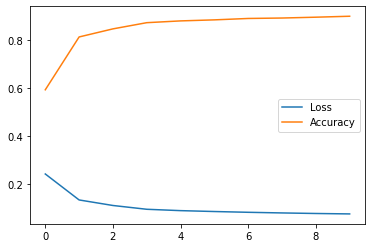

-------time taken to train model with  8 Nodes is  12.011004209518433 seconds ---------
RUNNING MODEL WITH  16  NODES


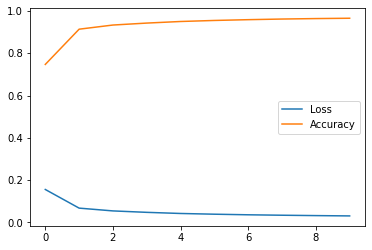

-------time taken to train model with  16 Nodes is  11.866026878356934 seconds ---------
RUNNING MODEL WITH  32  NODES


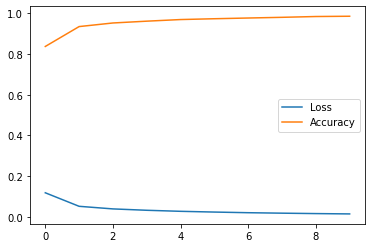

-------time taken to train model with  32 Nodes is  11.923835277557373 seconds ---------
RUNNING MODEL WITH  64  NODES


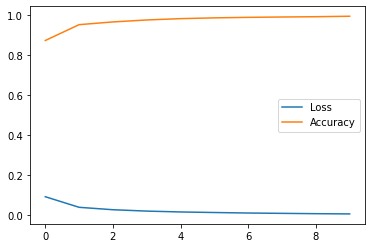

-------time taken to train model with  64 Nodes is  11.805975437164307 seconds ---------
RUNNING MODEL WITH  128  NODES


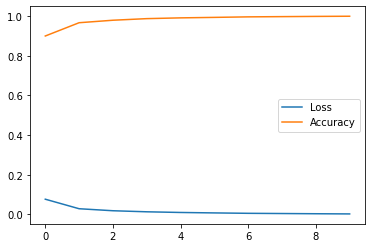

-------time taken to train model with  128 Nodes is  11.873444318771362 seconds ---------
RUNNING MODEL WITH  256  NODES


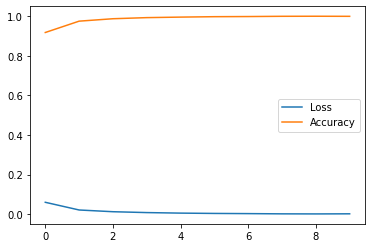

-------time taken to train model with  256 Nodes is  12.012165546417236 seconds ---------
RUNNING MODEL WITH  512  NODES


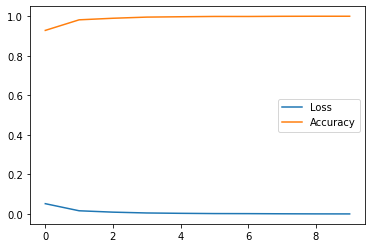

-------time taken to train model with  512 Nodes is  12.330965280532837 seconds ---------
RUNNING MODEL WITH  1028  NODES


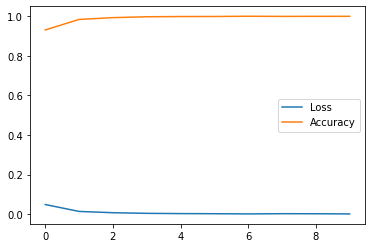

-------time taken to train model with  1028 Nodes is  12.972976922988892 seconds ---------


In [37]:
nodes=[8, 16, 32,64, 128, 256, 512 ,1028]
n_acc=[]
n_loss=[]
for node in nodes:
  a,b=run_model(X,y,node)
  n_acc.append(a)
  n_loss.append(b)

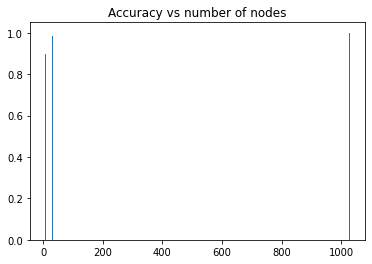

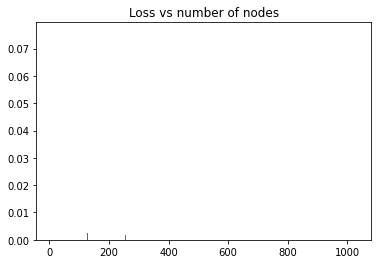

In [49]:
plt.bar([1,2,3,4,],n_acc)
plt.title('Accuracy vs number of nodes')
plt.show()
plt.bar(nodes,n_loss)
plt.title('Loss vs number of nodes')
plt.show()

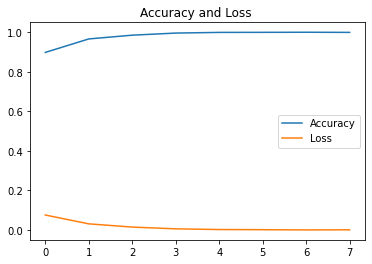

In [52]:
plt.plot(n_acc)
plt.plot(n_loss)
plt.legend(['Accuracy','Loss'])
plt.title('Accuracy and Loss ')
plt.show()

MODEL RUNNING WITH  2 layers
-------time taken to train model with  32 Nodes is  66.2457902431488 seconds ---------


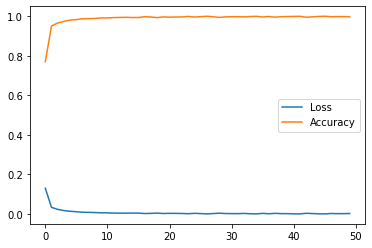

MODEL RUNNING WITH  3 layers
-------time taken to train model with  32 Nodes is  67.41928339004517 seconds ---------


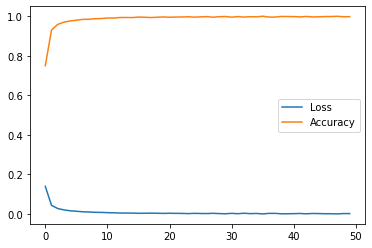

MODEL RUNNING WITH  4 layers
-------time taken to train model with  32 Nodes is  68.13347792625427 seconds ---------


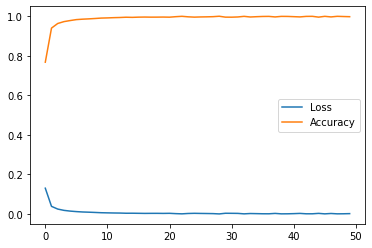

MODEL RUNNING WITH  5 layers
-------time taken to train model with  32 Nodes is  67.86597061157227 seconds ---------


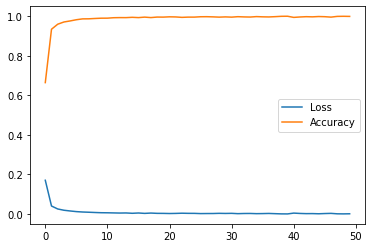

In [17]:
layers=[1,2,3,4]
loss=[]
acc=[]
for layer in layers:
  start_time=time.time()
  print('MODEL RUNNING WITH ',layer+1,'layers')
  model = Sequential()
  model.add(Dense(32, input_dim=1024, activation='relu'))
  for i in range(len(layers)):
    model.add(Dense(32,activation='relu'))
  model.add(Dense(10, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[tf.keras.metrics.CategoricalAccuracy()])
  hist=model.fit(X, to_categorical(y), epochs=50, verbose=0)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['categorical_accuracy'])
  plt.legend(['Loss','Accuracy'])
  acc.append(hist.history['categorical_accuracy'][-1])
  loss.append(hist.history['loss'][-1])
  print('-------time taken to train model with ',32,'Nodes is ',(time.time() - start_time),'seconds ---------')
  plt.show()

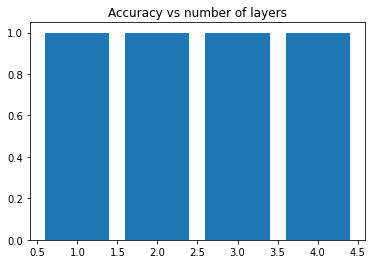

Accuracy for corresponding layers is :
2 layer :  0.996529221534729
3 layer :  0.9972939491271973
4 layer :  0.9972939491271973
5 layer :  0.9991176128387451


In [44]:

plt.bar(layers,acc)
plt.title('Accuracy vs number of layers')
plt.show()

print('Accuracy for corresponding layers is :')
for i in range(len(layers)):
  print(layers[i]+1,"layer : ",acc[i])

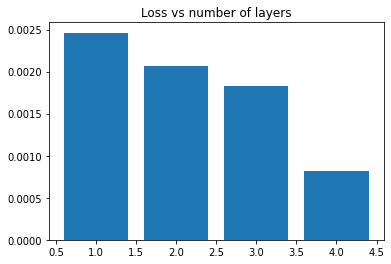

Loss for corresponding layers is :
2 layer :  0.0024622795172035694
3 layer :  0.002067841123789549
4 layer :  0.0018235668540000916
5 layer :  0.0008207864593714476


In [43]:


plt.bar(layers,loss)
plt.title('Loss vs number of layers')
plt.show()
print('Loss for corresponding layers is :')
for i in range(len(layers)):
  print(layers[i]+1,"layer : ",loss[i])